In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
# pd.set_options("display max columns",None)

In [2]:
adult_df=pd.read_csv('adult_data.csv',header=None,delimiter= ' *, *')#to remove leading and lagging space


In [3]:
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
adult_df.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_wee','native_country','income']
adult_df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_wee,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
adult_df.shape

(32561, 15)

In [6]:
adult_df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_wee      int64
native_country    object
income            object
dtype: object

# step 3

In [7]:
def create_piechart(data,column):
    """
    objective: create piechart for categorical variables present in the dataset
    params:
         data:this is pandas datarame
         column:this is column name which is use to create plot
      
     return:This will show piechart
    """
    labels=list(data[column].value_counts().to_dict().keys())
    sizes=list(data[column].value_counts().to_dict().values())
    plt.pie(sizes,labels=labels,autopct='%1.2f%%',shadow=False,startangle=45)
    plt.axis('equal')
    plt.title("piechart - {}".format(column))
    plt.show()

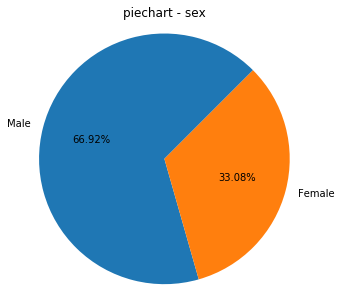

In [8]:
plt.figure(figsize=(5,5))
create_piechart(adult_df,"sex")

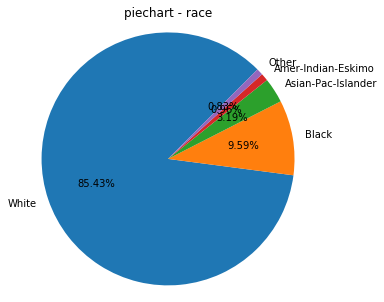

In [9]:
plt.figure(figsize=(5,5))
create_piechart(adult_df,"race")

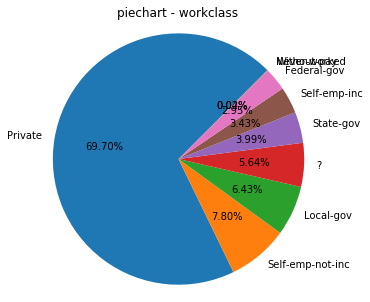

In [10]:
plt.figure(figsize=(5,5))
create_piechart(adult_df,"workclass")

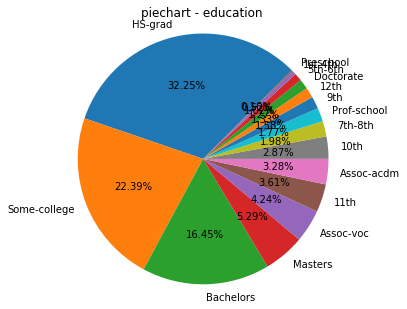

In [11]:
plt.figure(figsize=(5,5))
create_piechart(adult_df,"education")

## Step4:data preprocessing

In [12]:
adult_df_rev=pd.DataFrame.copy(adult_df)

In [13]:
adult_df_rev=adult_df_rev.drop(["education","fnlwgt"],axis=1)

In [14]:
adult_df_rev.shape

(32561, 13)

In [15]:
adult_df_rev=adult_df_rev.replace(['?'],np.nan)

In [16]:
adult_df_rev.isnull().sum()

age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_wee        0
native_country     583
income               0
dtype: int64

In [17]:
for i in adult_df_rev.columns:
    print(i,"--"*25)
    print(adult_df_rev[i].value_counts())
    print()

age --------------------------------------------------
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

workclass --------------------------------------------------
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

education_num --------------------------------------------------
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

marital_status --------------------------------------------------
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed         

In [18]:
def missing_data(data):
    """
    objective: check missing value count and percentage in all columns
    data:input data frame
    return:Missing value data frame
    """
    total=data.isnull().sum().sort_values(ascending=False)
    percent=(data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    missing_data=pd.concat([total,percent],axis=1,keys=["total","percent"])
    return missing_data

In [19]:
missing_data(adult_df_rev)

,total,percent
occupation,1843,5.660146
workclass,1836,5.638647
native_country,583,1.790486
income,0,0.000000
hours_per_wee,0,0.000000
capital_loss,0,0.000000
capital_gain,0,0.000000
sex,0,0.000000
race,0,0.000000
relationship,0,0.000000


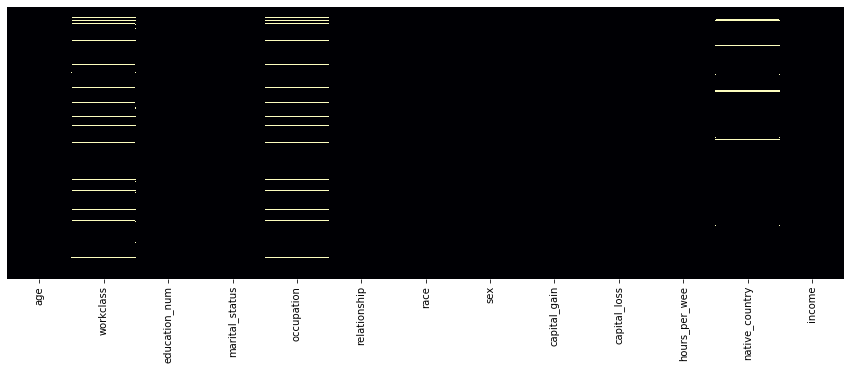

In [20]:
plt.figure(figsize=(15,5))
sns.heatmap(adult_df_rev.isnull(),cbar=False,yticklabels=False,cmap="magma")

In [21]:
adult_df_rev["workclass"].mode()


0    Private
dtype: object

In [22]:
print(adult_df_rev["workclass"].mode()[0])
print(adult_df_rev["occupation"].mode()[0])
print(adult_df_rev["native_country"].mode()[0])

Private
Prof-specialty
United-States


In [23]:
for value in ['workclass','occupation','native_country']:
    adult_df_rev[value].fillna(adult_df_rev[value].mode()[0],inplace=True)

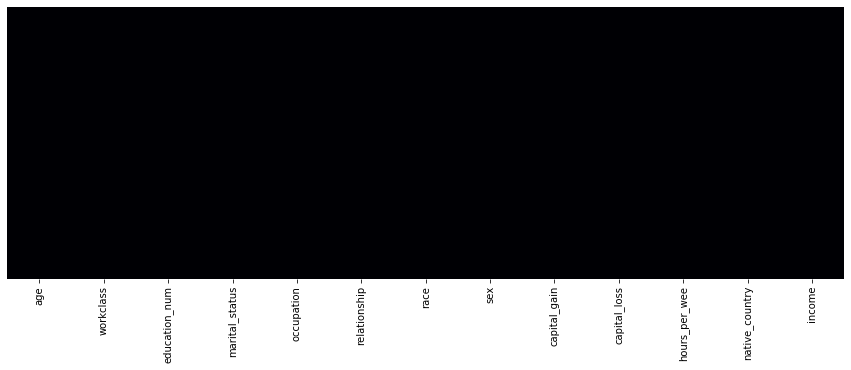

In [24]:
plt.figure(figsize=(15,5))
sns.heatmap(adult_df_rev.isnull(),cbar=False,yticklabels=False,cmap="magma")

In [25]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_wee     0
native_country    0
income            0
dtype: int64

In [26]:
# for x in adult_df_rev.columns:
#     if adult_df_rev[x].dtypes=="object" or adult_df_rev[x].dtypes=="bool":
#         adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)
#     elif adult_df_rev[x].dtypes=="int64" or adult_df_rev[x].dtypes=="float64":
#         adult_df_rev[x].fillna(adult_df_rev[x].mean(),inplace=True)
# note: use as second hand approach as manual is always the best because we can fill or replace 
#       the values according to our needs but its not the same case in this approach

In [27]:
adult_df_rev.workclass.value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [28]:
#    colname_cat=['workclass','marital_status','occupation','relationship','race','sex','native_country','income']

In [29]:
colname_cat=[]
for i in adult_df_rev.columns:
    if adult_df_rev[i].dtype=="object":
        colname_cat.append(i)
colname_cat

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

# using dummy variable

In [30]:
adult_df_rev_new=pd.get_dummies(adult_df_rev,drop_first=True)
adult_df_rev_new.head()
# this is used to convert the categorical data into numerical data
# this process can be done by either this method and onehotencoder method 
# in this it automatically identifies which is categorical column and which is numerical 
# column whereas in onehotencoder you have to pass manuall only the categorical column and then 
# concat it with the numerical column

,age,education_num,capital_gain,capital_loss,hours_per_wee,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_>50K
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# onehotencoder

In [31]:
from sklearn import preprocessing
le= preprocessing.OneHotEncoder()
adult_df_rev_cat=pd.DataFrame(le.fit_transform(adult_df_rev[colname_cat]).toarray())
# pass only categorical data

In [32]:
adult_df_rev_cat.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
colname_num=[]
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype!="object":
        colname_num.append(x)
colname_num

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_wee']

In [34]:
adult_df_rev_num=adult_df_rev[colname_num]

In [35]:
adult_df_rev_new=pd.concat([adult_df_rev_num,adult_df_rev_cat],axis=1)
adult_df_rev_new.head()

,age,education_num,capital_gain,capital_loss,hours_per_wee,0,1,2,3,4,...,75,76,77,78,79,80,81,82,83,84
0,39,13,2174,0,40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,50,13,0,0,13,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,38,9,0,0,40,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,53,7,0,0,40,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,28,13,0,0,40,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# label_encoder

In [36]:
colname_cat=[]
for i in adult_df_rev.columns:
    if adult_df_rev[i].dtype=="object":
        colname_cat.append(i)
colname_cat

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [37]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for x in colname_cat:
    adult_df_rev[x]=le.fit_transform(adult_df_rev[x])
    print()
    le_name_mapping=dict(zip(le.classes_,le.transform(le.classes_)))
    print("Feature",x)
    print("mapping",le_name_mapping)


Feature workclass
mapping {'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'Private': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'State-gov': 6, 'Without-pay': 7}

Feature marital_status
mapping {'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6}

Feature occupation
mapping {'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13}

Feature relationship
mapping {'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}

Feature race
mapping {'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Other': 3, 'White': 4}

Feature sex
mapping {'Female': 0, 'Male': 1}

Feature native_country
mapping {'Cambodia': 0, '

In [38]:
adult_df_rev.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_wee,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [39]:
adult_df_rev.shape

(32561, 13)

In [40]:
X=adult_df_rev.values[:,0:-1]
y=adult_df_rev.values[:,-1]

In [41]:
X.shape,y.shape

((32561, 12), (32561,))

# splitting data into train set

FULL DATA -> TRAIN , TEST
Train,Test

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=10)
print("Train size",X_train.shape,y_train.shape)
print("Test size",X_test.shape,y_test.shape)


Train size (22792, 12) (22792,)
Test size (9769, 12) (9769,)


# Data scaling

In [43]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)

y=y.astype(int)


In [44]:
X_train_scale


array([[0.04109589, 0.42857143, 0.6       , ..., 0.        , 0.14285714,
        0.95      ],
       [0.20547945, 0.42857143, 0.53333333, ..., 0.        , 0.39795918,
        0.95      ],
       [0.2739726 , 0.42857143, 0.53333333, ..., 0.        , 0.39795918,
        0.95      ],
       ...,
       [0.02739726, 0.42857143, 0.6       , ..., 0.        , 0.39795918,
        0.95      ],
       [0.23287671, 0.42857143, 0.4       , ..., 0.        , 0.39795918,
        0.5       ],
       [0.02739726, 0.42857143, 0.53333333, ..., 0.        , 0.39795918,
        0.95      ]])

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
%%time
classifier=LogisticRegression()
classifier.fit(X_train_scale,y_train)
y_pred=classifier.predict(X_test_scale)
print(list(zip(y_test,y_pred)))

[(0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 1), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (1, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),

In [47]:
Y=b0+b1*x1+b2*X2+b3*X3

NameError: name 'b0' is not defined

In [48]:
print(list(zip(adult_df_rev.columns[:-1],classifier.coef_.ravel())))
print(classifier.intercept_)

[('age', 2.57065762260308), ('workclass', -0.631734499293175), ('education_num', 4.908996610654628), ('marital_status', -1.3388878283250418), ('occupation', -0.04715065390693944), ('relationship', -0.5548006988138187), ('race', 0.521833881623593), ('sex', 0.8833704846469399), ('capital_gain', 17.062005395108553), ('capital_loss', 2.804694160674277), ('hours_per_wee', 2.9144989367987475), ('native_country', 0.06949349534655098)]
[-6.80219974]


In [49]:
adult_df_rev["income"].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm =confusion_matrix(y_test,y_pred)

print(cfm)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)

[[7026  397]
 [1332 1014]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.43      0.54      2346

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8230115672023749


# adjusting the threshold

In [51]:
y_pred_prob=classifier.predict_proba(X_test_scale)
print(y_pred_prob)

[[0.96272208 0.03727792]
 [0.96615456 0.03384544]
 [0.36984218 0.63015782]
 ...
 [0.79529773 0.20470227]
 [0.81162828 0.18837172]
 [0.1483617  0.8516383 ]]


In [52]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value >0.45:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(y_test,y_pred_class)
print(cfm)
acc=accuracy_score(y_test,y_pred_class)
print(classification_report(y_test,y_pred_class))
print("Accuracy of the model: ",acc)

[[6862  561]
 [1196 1150]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      7423
           1       0.67      0.49      0.57      2346

    accuracy                           0.82      9769
   macro avg       0.76      0.71      0.73      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8201453577643566


In [54]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine=np.where(y_pred_prob[:,1]>a,1,0)
    cfm=confusion_matrix(y_test,predict_mine)
    total_err=round(cfm[0,1]+cfm[1,0])
    print("Threshold: {} TotalER: {} Type 2: {} Type 1: {}".format(round(a,2),total_err,cfm[1,0],cfm[0,1]))

Threshold: 0.4 TotalER: 1778 Type 2: 1063 Type 1: 715
Threshold: 0.41 TotalER: 1768 Type 2: 1094 Type 1: 674
Threshold: 0.42 TotalER: 1757 Type 2: 1119 Type 1: 638
Threshold: 0.43 TotalER: 1743 Type 2: 1140 Type 1: 603
Threshold: 0.44 TotalER: 1752 Type 2: 1169 Type 1: 583
Threshold: 0.45 TotalER: 1757 Type 2: 1196 Type 1: 561
Threshold: 0.46 TotalER: 1750 Type 2: 1230 Type 1: 520
Threshold: 0.47 TotalER: 1728 Type 2: 1248 Type 1: 480
Threshold: 0.48 TotalER: 1721 Type 2: 1275 Type 1: 446
Threshold: 0.49 TotalER: 1721 Type 2: 1303 Type 1: 418
Threshold: 0.5 TotalER: 1729 Type 2: 1332 Type 1: 397
Threshold: 0.51 TotalER: 1724 Type 2: 1357 Type 1: 367
Threshold: 0.52 TotalER: 1725 Type 2: 1381 Type 1: 344
Threshold: 0.53 TotalER: 1735 Type 2: 1405 Type 1: 330
Threshold: 0.54 TotalER: 1742 Type 2: 1428 Type 1: 314
Threshold: 0.55 TotalER: 1751 Type 2: 1457 Type 1: 294
Threshold: 0.56 TotalER: 1753 Type 2: 1482 Type 1: 271
Threshold: 0.57 TotalER: 1760 Type 2: 1510 Type 1: 250
Threshold: 0

In [55]:
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(y_test, y_pred_prob[:, 1])
auc = metrics.auc(fpr,tpr)

print(auc)

0.8493355310600598


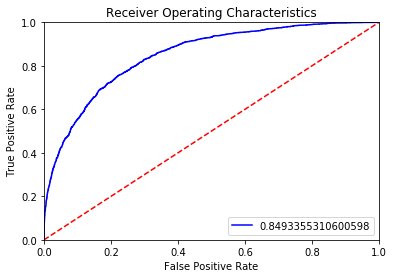

In [56]:
import matplotlib.pyplot as plt
plt.title('AUC')
plt.plot(fpr,tpr, 'b' , label = auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [57]:
from sklearn import metrics
# y_pred_class is the list of predicted values on the basic of 0.46 threshold
fpr, tpr, z = metrics.roc_curve(y_test, y_pred_class)
auc = metrics.auc(fpr, tpr)
print(auc)
print(fpr)
print(tpr)

0.7073100828638069
[0.         0.07557591 1.        ]
[0.         0.49019608 1.        ]


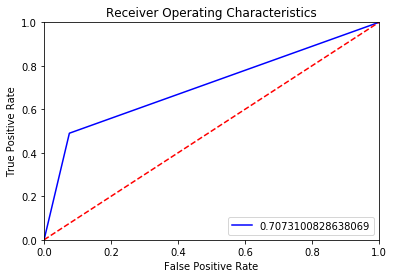

In [58]:
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

AUC:
1. Find the overall AUC of the model by passing the entire prob matrix to the roc_curve function. It will try and test various different thresholds and end up giving a proper ROC curve.
2. Try generating the AUC value on the basis of individual thresholds.(try only upon the ambiguous thresholds which end up giving you almost the same error)
3. Finally conclude upon the threshold which gives you an AUC closest to the overall AUC.

.AUC <= 0.5 worst
.0.5-0.6-> Poor
.0.6-0.7-> bad
.0.7-0.8-> good
.0.8-0.9-> V good
.0.9-1.0-> Excellent

In [65]:
#Using cross validation
#Using cross validation

classifier = LogisticRegression()

#performing kfold_cross_validation 
from sklearn.model_selection import KFold

kfold_cv=KFold(n_splits=10,
               random_state=10,
               shuffle=True)

#print(kfold_cv)

from sklearn.model_selection import cross_val_score


#running the model using scoring metric as accuracy 
kfold_cv_result=cross_val_score(estimator =classifier,
                                X=X_train_scale,
                                y=y_train,
                                cv=kfold_cv)

print(kfold_cv_result) 

#finding the mean

print(kfold_cv_result.mean())

[0.82763158 0.8245614  0.82623958 0.81790259 0.81965774 0.82097411
 0.82492321 0.82843352 0.81570864 0.8095656 ]
0.8215597984650085


In [74]:
for train_value,test_value in kfold_cv.split(X_train_scale):
    classifier.fit(X_train_scale[train_value],y_train[train_value]).predict(X_train_scale[test_value])
y_pred=classifier.predict(X_test_scale)

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm =confusion_matrix(y_test,y_pred)

print(cfm)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)

[[7022  401]
 [1330 1016]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.43      0.54      2346

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8228068379568021


In [121]:
X = adult_df_rev.values[:,:-1]
y = adult_df_rev.values[:,-1]

In [122]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
colname = adult_df_rev.columns
test = SelectKBest(score_func=chi2, k=2)
fit1 = test.fit(X,y)
print(fit1.scores_)
print(list(zip(colname,fit1.get_support())))
X=fit1.transform(X)

[8.60061182e+03 9.35436386e-02 2.40142178e+03 1.12346982e+03
 1.00356439e+02 3.65914312e+03 3.30313051e+01 5.02439419e+02
 8.21924671e+07 1.37214589e+06 6.47640900e+03 1.74341889e+01]
[('age', False), ('workclass', False), ('education_num', False), ('marital_status', False), ('occupation', False), ('relationship', False), ('race', False), ('sex', False), ('capital_gain', True), ('capital_loss', True), ('hours_per_wee', False), ('native_country', False)]


In [123]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [124]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train, Y_test =  train_test_split(X, y ,test_size=0.3,random_state=10)

In [125]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression()
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)

In [126]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm =confusion_matrix(Y_test,Y_pred)

print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7222  201]
 [1664  682]]
Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      7423
           1       0.77      0.29      0.42      2346

    accuracy                           0.81      9769
   macro avg       0.79      0.63      0.65      9769
weighted avg       0.80      0.81      0.77      9769

Accuracy of the model:  0.8090899785034292
